Project stage 1 review remark 1: Handling NaN values
The cleaned dataset has 11 customers with null TotalCharges.
All 11 customers with missing TotalCharges have a tenure of 0, meaning they are new customers who likely haven’t been billed yet.
The best solution is to fill the missing TotalCharges with 0, as it accurately reflects that they haven't accumulated charges yet.

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Telco-Customer-Churn-Cleaned.csv")

# Fill missing values in 'TotalCharges' with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# ensure correct data type for 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Save the updated DataFrame back to the same or new CSV file
df.to_csv("Telco-Customer-Churn-Cleaned-Updated.csv", index=False)


Project Stage 1 review remark 2:Formatting issues, such as typing errors or multiple ways to identify the same variable, were not checked. In the below section Im checking for Formatting and Consistency Issues


In [2]:
# 1. Get all object (categorical) columns
cat_columns = df.select_dtypes(include='object').columns

# 2. Check for inconsistent string values (capitalisation, whitespace, variants)
print("=== Unique Values in Categorical Columns ===")
for col in cat_columns:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals}")

# 3. Check for known variants that should be standardized
columns_to_check_variants = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

print("\n=== Columns Likely to Contain Inconsistent 'No <service>' Values ===")
for col in columns_to_check_variants:
    if col in df.columns:
        values = df[col].unique()
        if any("No " in str(v) for v in values):
            print(f"{col} → {values}")

# 4. Check if 'SeniorCitizen' is numeric but only has 0 or 1
print("\n=== Checking if 'SeniorCitizen' is Binary Categorical ===")
if df['SeniorCitizen'].nunique() == 2 and set(df['SeniorCitizen'].unique()) == {0, 1}:
    print("✔ 'SeniorCitizen' is numeric but categorical (0/1)")

# 5. Check 'TotalCharges' data type and missing values
print("\n=== TotalCharges Type & Missing Check ===")
print(f"Data type: {df['TotalCharges'].dtype}")
missing_count = df['TotalCharges'].isna().sum()
print(f"Missing values: {missing_count}")

# 6. Detect strings with inconsistent case or whitespace
print("\n=== Inconsistent Formatting (Case/Whitespace) ===")
for col in cat_columns:
    cleaned = df[col].astype(str).str.strip().str.lower()
    unique_cleaned = cleaned.unique()
    if len(unique_cleaned) < len(df[col].unique()):
        print(f"{col} has inconsistent formatting (case or whitespace)")


=== Unique Values in Categorical Columns ===
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']

=== Columns Likely to Contain Inconsistent 'No <service>' Values ===
MultipleLines → ['No phone service' 'No' 'Yes']
OnlineSecurity → ['No' 'Yes' 'No interne

Fix all identified issues

In [3]:

# 1. Replace 'No internet service' and 'No phone service' with 'No'
columns_with_variants = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in columns_with_variants:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# 2. Standardize string values across all object columns (strip whitespace, lowercasing optional)
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col] = df[col].astype(str).str.strip()

# 3. Convert 'SeniorCitizen' to category if needed
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

# 4. Ensure 'TotalCharges' is numeric and fill missing values with 0 (valid for tenure == 0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# 5. Save the cleaned dataset to a new CSV file
df.to_csv("Telco-Customer-Churn-Cleaned-Final.csv", index=False)

print("✔ Dataset cleaned and saved as 'Telco-Customer-Churn-Cleaned-Final.csv'")


✔ Dataset cleaned and saved as 'Telco-Customer-Churn-Cleaned-Final.csv'


All "No internet service" and "No phone service" → replaced with "No"

All text columns are stripped of extra whitespace

SeniorCitizen is treated as categorical ( 0/1 flags)

TotalCharges is converted to float and missing values filled with 0

Project stage 1 review remark 3: Data schema is not clearly outlined. In the below section i outline the data schema

In [4]:
# Column descriptions 
column_descriptions = {
    'customerID': 'Unique customer identifier',
    'gender': 'Gender of the customer',
    'SeniorCitizen': '1 = Senior, 0 = Non-senior',
    'Partner': 'Whether the customer has a partner (Yes/No)',
    'Dependents': 'Whether the customer has dependents (Yes/No)',
    'tenure': 'Number of months the customer has stayed',
    'PhoneService': 'Whether the customer has phone service',
    'MultipleLines': 'Whether the customer has multiple phone lines',
    'InternetService': 'Type of internet service (DSL/Fiber/No)',
    'OnlineSecurity': 'Whether the customer has online security service',
    'OnlineBackup': 'Whether the customer has online backup service',
    'DeviceProtection': 'Whether the customer has device protection',
    'TechSupport': 'Whether the customer has tech support service',
    'StreamingTV': 'Whether the customer has streaming TV service',
    'StreamingMovies': 'Whether the customer has streaming movies service',
    'Contract': 'Contract term (Month-to-month, One year, Two year)',
    'PaperlessBilling': 'Whether the customer uses paperless billing',
    'PaymentMethod': 'Customer\'s payment method',
    'MonthlyCharges': 'Monthly amount charged to the customer',
    'TotalCharges': 'Total amount charged to the customer',
    'Churn': 'Whether the customer has churned (Yes/No)'
}

# Schema table
schema_df = pd.DataFrame({
    "Column": df.columns,
    "Data Type": df.dtypes.values,
    "Non-Null Count": df.notnull().sum().values,
    "Unique Values": [df[col].nunique() for col in df.columns],
    "Description": [column_descriptions.get(col, "") for col in df.columns]
})

# Print the table
print(schema_df)


schema_df.to_csv("data_schema.csv", index=False)


              Column Data Type  Non-Null Count  Unique Values  \
0         customerID    object            7043           7043   
1             gender    object            7043              2   
2      SeniorCitizen  category            7043              2   
3            Partner    object            7043              2   
4         Dependents    object            7043              2   
5             tenure     int64            7043             73   
6       PhoneService    object            7043              2   
7      MultipleLines    object            7043              2   
8    InternetService    object            7043              3   
9     OnlineSecurity    object            7043              2   
10      OnlineBackup    object            7043              2   
11  DeviceProtection    object            7043              2   
12       TechSupport    object            7043              2   
13       StreamingTV    object            7043              2   
14   StreamingMovies    o

Project stage 1 review remark 4:The analysis also focuses on only three variables, despite the dataset containing 21 attributes. Was there a specific reason for this selection? Given your research question, a correlation analysis could have provided useful insights into which variables are most relevant to customer churn.

To identify the key variables influencing customer churn, I started with all 21 features in the dataset and removed non-informative columns such as customerID. The remaining features were categorized into numerical and categorical types. I retainedthe variables that directly reflect customer behavior, subscription details, billing preferences, or demographic attributes. This included numerical features like tenure, MonthlyCharges, and TotalCharges, which are likely indicators of usage or billing pressure. Categorical features such as Contract, TechSupport, InternetService, and PaymentMethod were selected based on domain knowledge and their potential relevance to customer satisfaction and loyalty.

In [11]:
print(df.columns.tolist())


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [13]:
# Separate features by type
categorical_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a reference table of selected variables
focus_variables = pd.DataFrame({
    "Variable": categorical_vars + numerical_vars,
    "Type": ["Categorical"] * len(categorical_vars) + ["Numerical"] * len(numerical_vars),
    "Reason for Focus": (
        ["Potential service or customer demographic driver of churn"] * len(categorical_vars) +
        ["Financial or duration indicators impacting churn"] * len(numerical_vars)
    )
})

print(focus_variables)


            Variable         Type  \
0             gender  Categorical   
1      SeniorCitizen  Categorical   
2            Partner  Categorical   
3         Dependents  Categorical   
4       PhoneService  Categorical   
5      MultipleLines  Categorical   
6    InternetService  Categorical   
7     OnlineSecurity  Categorical   
8       OnlineBackup  Categorical   
9   DeviceProtection  Categorical   
10       TechSupport  Categorical   
11       StreamingTV  Categorical   
12   StreamingMovies  Categorical   
13          Contract  Categorical   
14  PaperlessBilling  Categorical   
15     PaymentMethod  Categorical   
16            tenure    Numerical   
17    MonthlyCharges    Numerical   
18      TotalCharges    Numerical   

                                     Reason for Focus  
0   Potential service or customer demographic driv...  
1   Potential service or customer demographic driv...  
2   Potential service or customer demographic driv...  
3   Potential service or customer d

Project Stage two:

In the following sections I run the logistic regression algorithm on the final CSV file (Telco-Customer-Churn-Cleaned-Final.csv)
All the columns in the CSV file will be used as input to the model, except Customer ID as its a unique identifier, and Churn as it is the output.
Categorical columns are one-hot encoded
Numerical columns (tenure, MonthlyCharges, TotalCharges) are scaled

In [ ]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



In [ ]:
# STEP 2: Load and Prepare the Dataset
df = pd.read_csv("Telco-Customer-Churn-Cleaned-Final.csv")

# Drop customer ID column if it exists
df.drop(columns=["customerID"], inplace=True, errors='ignore')

# Encode the target variable
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})



Top correlated features with churn:
Churn                1.000000
Churn_Probability    0.537905
MonthlyCharges       0.193356
SeniorCitizen        0.150889
TotalCharges        -0.198324
tenure              -0.352229
Name: Churn, dtype: float64


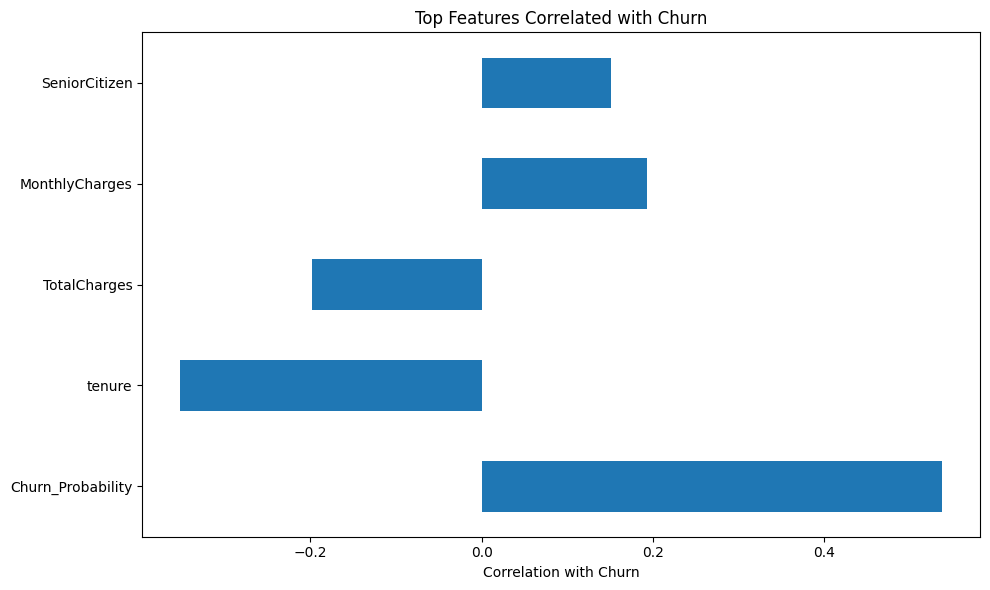

In [34]:
# STEP 3: Correlation Analysis (numerical columns only)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Correlation with Churn
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print("Top correlated features with churn:")
print(churn_corr.head(10))

# Plot top correlations
plt.figure(figsize=(10, 6))
churn_corr.drop('Churn').sort_values(key=abs, ascending=False).head(10).plot(kind='barh')
plt.title("Top Features Correlated with Churn")
plt.xlabel("Correlation with Churn")
plt.tight_layout()
plt.show()


One-hot encoding is applied to convert categorical variables like Contract and PaymentMethod into binary features (e.g., Contract_Two year, TechSupport_No)



In [35]:
# STEP 4: One-Hot Encode Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



Numerical features (tenure, MonthlyCharges, TotalCharges) are standardized using StandardScaler for better convergence with regularization

In [36]:
# STEP 5: Scale Numerical Features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


Features (X) and target (y) are separated

The data is split using stratified sampling to preserve the churn rate across both sets (80% train, 20% test)

In [28]:
# STEP 6: Define Features and Target, Then Split Data
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)



Training set size: (5634, 23)
Testing set size: (1409, 23)


The logistic regression model is trained using model.fit(X_train, y_train)

Internally, it:

Initializes coefficients (β)

Uses coordinate descent (via liblinear) to minimize log-loss + L2 penalty

Adjusts weights to emphasize churners via class_weight='balanced'

Stops when either convergence is achieved or 1000 iterations are reached

In [39]:
# STEP 7: Train Logistic Regression Model
model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear'
)
model.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

y_proba → the churn probability for each customer (sigmoid output)

y_pred → final class prediction (1 if prob ≥ 0.5, else 0)

Precision, Recall, F1-score are computed using classification_report

ROC-AUC score measures overall discrimination ability

Confusion matrix visualizes true/false positives and negatives

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC-AUC Score: 0.841997984964737


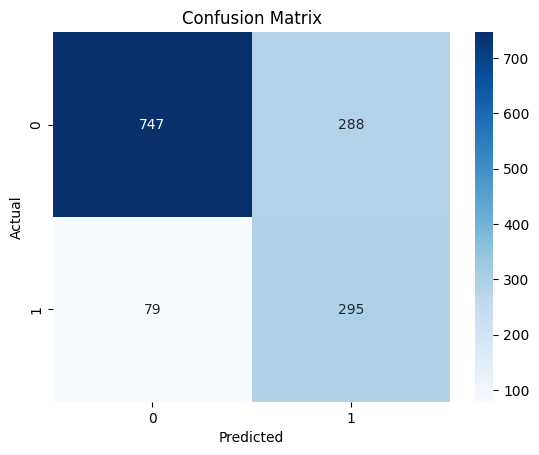

In [30]:
# STEP 8: Evaluate the Model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Each input feature has an associated coefficient (β)

Positive β → increases churn likelihood (e.g., TechSupport_No)

Negative β → decreases churn likelihood (e.g., Contract_Two year)

Top 10 features are sorted and displayed for business insight

In [37]:
# STEP 9: Interpret Feature Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Top 10 most impactful features:")
print(coef_df.head(10))



Top 10 most impactful features:
                           Feature  Coefficient
18               Contract_Two year    -1.415941
1                           tenure    -1.154154
10              InternetService_No    -1.005398
9      InternetService_Fiber optic     0.962532
17               Contract_One year    -0.721442
3                     TotalCharges     0.483253
21  PaymentMethod_Electronic check     0.398491
11              OnlineSecurity_Yes    -0.385364
7                 PhoneService_Yes    -0.374791
19            PaperlessBilling_Yes     0.336137


model.predict_proba() is used to compute churn probabilities for all customers

The top 20% highest-risk customers are extracted
These can be targeted with retention campaigns or personalized offers

In [38]:

# STEP 10: Risk-Based Segmentation - Identify High-Risk Customers
df['Churn_Probability'] = model.predict_proba(X)[:, 1]

# Top 20% churn risk
high_risk = df[df['Churn_Probability'] >= df['Churn_Probability'].quantile(0.80)]

print("Number of high-risk customers:", high_risk.shape[0])
high_risk.head()


Number of high-risk customers: 1409


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Probability
0,0,-1.277445,-1.160323,-0.992611,0,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,0.805913
4,0,-1.236724,0.197365,-0.938874,1,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,0.856157
5,0,-0.992402,1.159546,-0.643789,1,False,False,False,True,True,...,False,True,True,False,False,True,False,True,False,0.908491
8,0,-0.177995,1.330711,0.338085,1,False,True,False,True,True,...,True,True,True,False,False,True,False,True,False,0.815744
19,0,-0.463037,0.840481,-0.183900,0,False,False,False,True,False,...,False,False,True,False,False,True,False,True,False,0.784203
